### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

### Initial Set-up
#### Read Image

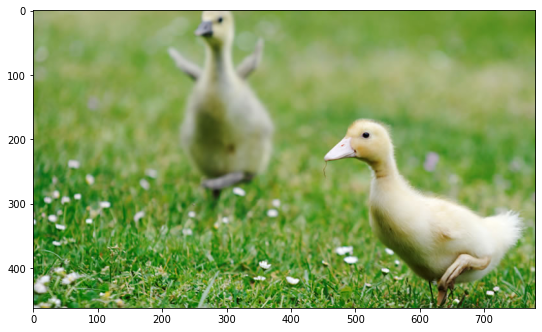

In [99]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image = mpimg.imread('images/ugly_duckling.jpg')
plt.figure(figsize=(9,9))
plt.imshow(image)

#### Convert to Grayscale

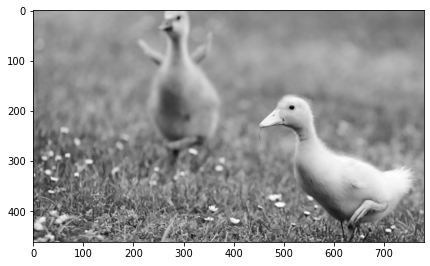

In [100]:
import numpy as np

grayim = np.dot(image, [0.2989, 0.5870, 0.1140])
plt.figure(figsize=(7,7))

plt.imshow(grayim, cmap='gist_gray')

#### Fast Fourier Transform

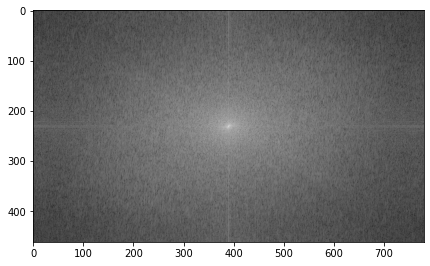

In [101]:
from scipy import fftpack

dim_x, dim_y = grayim.shape

n = np.sqrt(dim_x*dim_y)
D1 = fftpack.fft2(grayim)/n
D2 = fftpack.fftshift(D1)
abs_image = np.log(np.abs(D2))

plt.figure(figsize=(7,7))
plt.imshow(abs_image, cmap='gist_gray')

### Low Pass Filtering

#### Masking the Image

For Low Pass filter, we will allow only the lower frequency to pass through, this will result in the image blurring

###### *Note since the dimensions of the image aren't the same, need to have different n and I for x and y*

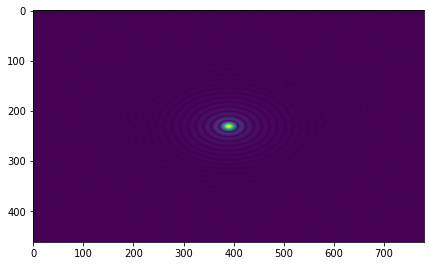

In [102]:

def init_x_y(dim_x=dim_x, dim_y=dim_y):
    nx = dim_x+1
    Ix = np.arange(1, nx)
    x = Ix - nx / 2


    ny = dim_y+1
    Iy = np.arange(1,ny)
    y = ny / 2 - Iy

    X = x[:, np.newaxis]
    Y = y[np.newaxis, :]
    return X, Y

def low_pass_mask(R=25, dim_x=dim_x, dim_y=dim_y):
    X, Y = init_x_y(dim_x=dim_x, dim_y=dim_y)

    M = X**2 + Y**2 < R**2
    return M

low_pass_M = low_pass_mask()

low_mask_1 = fftpack.fft2(low_pass_M)/n
low_mask_2 = fftpack.fftshift(low_mask_1)

plt.figure(figsize=(7,7))
low_mask = np.abs(low_mask_2)
plt.imshow(low_mask)

#### Filtering the image with mask

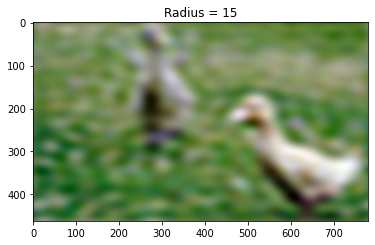

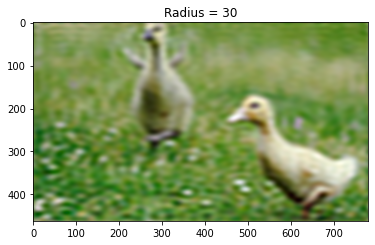

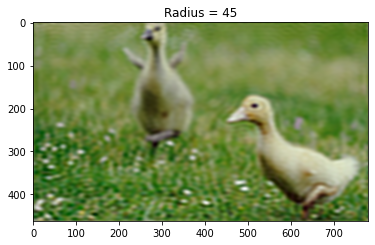

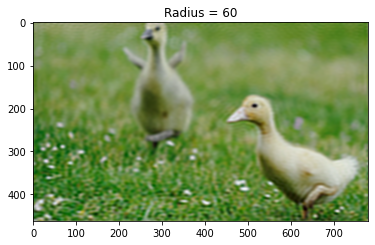

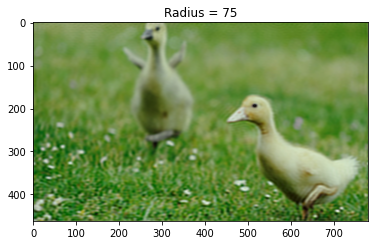

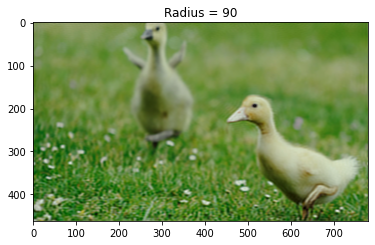

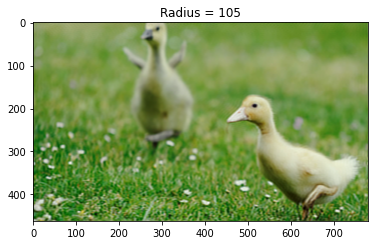

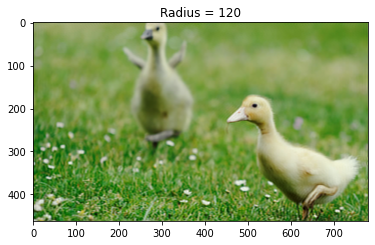

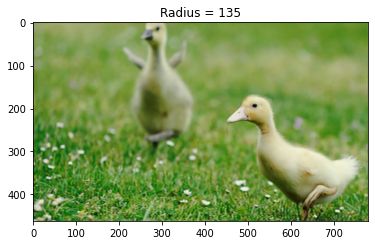

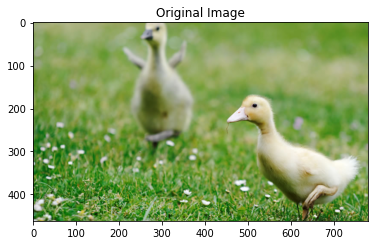

In [103]:
def inv_color(D2, M):
    shifted_D2 = np.fft.fftshift(D2*M)
    inverse = np.fft.ifft2(shifted_D2)
    image_inv = np.abs(inverse)
    image_inv -= image_inv.min()
    image_inv *= 255.0/image_inv.max()
    image_inv = image_inv.astype(dtype='int64')
    return image_inv

def mask_color(color, M, image=image, n=n):
    colorim = image[...,color]
    D1 = fftpack.fft2(colorim)/n
    D2 = fftpack.fftshift(D1)
    return inv_color(D2, M)

def low_pass_filter(R=25, dim_x=dim_x, dim_y=dim_y):
    M = low_pass_mask(R=R, dim_x=dim_x, dim_y=dim_y)

    restored_img = np.dstack([mask_color(i, M) for i in range(3)])
    return restored_img

for i in range(1,10):
    plt.imshow(low_pass_filter(R=15*(i)))
    plt.title('Radius = ' + str(15*(i)))
    plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

### High Pass Filtering

#### Masking the Image

For High Pass filter, we will allow only the higher frequency to pass through, which is the opposite of what we did in low pass filtering.

This will result in the image sharpening instead of blurring.

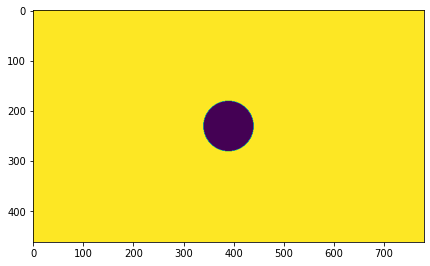

In [104]:

def high_pass_mask(R=25, dim_x=dim_x, dim_y=dim_y):
    X, Y = init_x_y(dim_x=dim_x, dim_y=dim_y)

    M = X**2 + Y**2 > R**2
    return M

high_pass_M = high_pass_mask(50)

high_mask_1 = fftpack.fft2(high_pass_M)/n
high_mask_2 = fftpack.fftshift(high_mask_1)

plt.figure(figsize=(7,7))
high_mask = np.abs(high_mask_2)
plt.imshow(high_pass_M)

#### Filtering image with mask

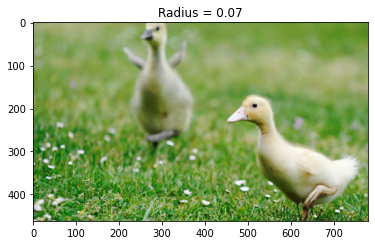

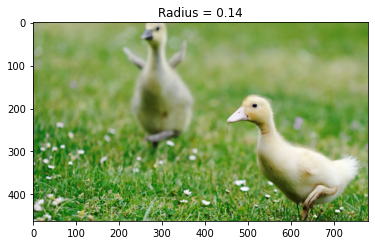

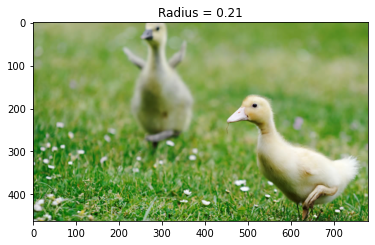

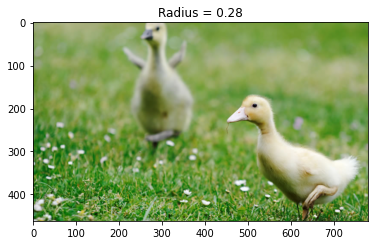

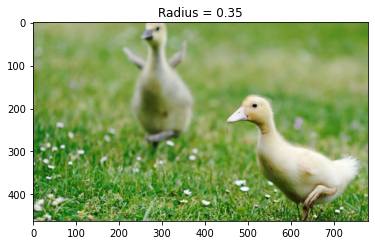

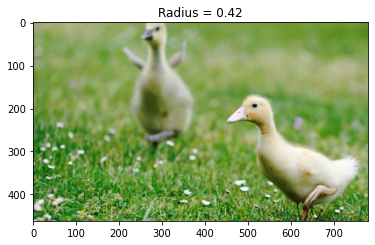

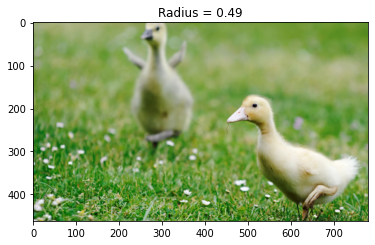

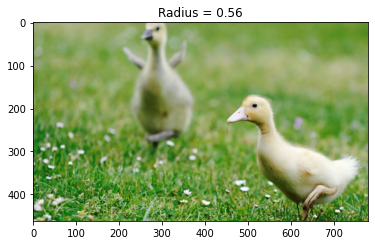

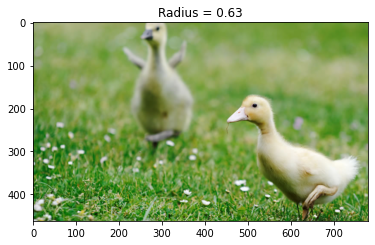

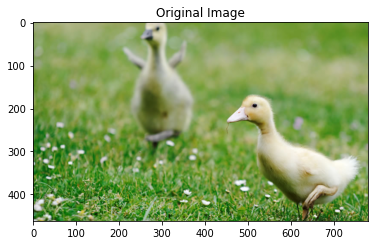

In [105]:
def high_pass_filter(R=25, dim_x=dim_x, dim_y=dim_y):
    M = high_pass_mask(R=R, dim_x=dim_x, dim_y=dim_y)
    restored_img = np.dstack([mask_color(i, M) for i in range(3)])
    return restored_img

for i in range(1,10):
    plt.imshow(high_pass_filter(R=0.07*(i)))
    plt.title('Radius = ' + str(round(0.07*(i),2)))
    plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

#### Doing same to grayscale (to show sharpening)

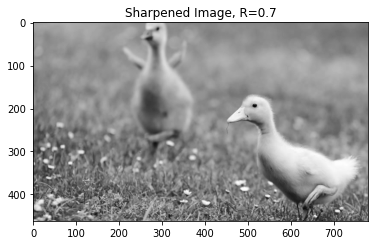

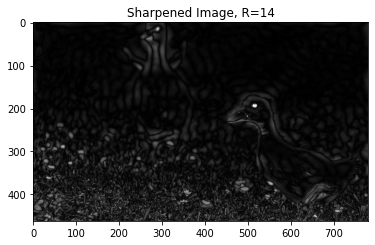

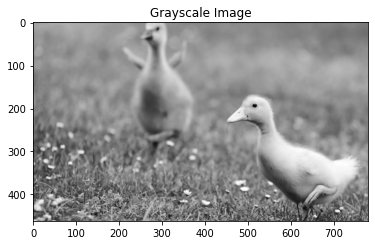

In [106]:
gray_high_mask_07 = high_pass_mask(R=0.7)
gray_high_pass_07 = inv_color(D2, gray_high_mask_07)

plt.imshow(gray_high_pass_07, cmap='gist_gray')
plt.title('Sharpened Image, R=0.7')
plt.show()

gray_high_mask_14 = high_pass_mask(R=14)
gray_high_pass_14 = inv_color(D2, gray_high_mask_14)

plt.imshow(gray_high_pass_14, cmap='gist_gray')
plt.title('Sharpened Image, R=14')
plt.show()

plt.imshow(grayim, cmap='gist_gray')
plt.title('Grayscale Image')
plt.show()

### Band Pass Filtering

#### We only allow the frequency that is 'just right' to go through (not too high and not too low)

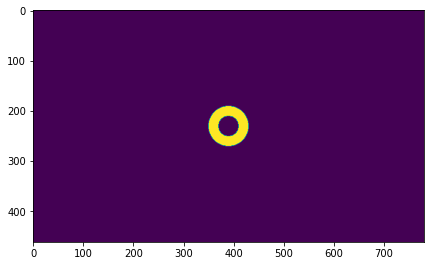

In [138]:
def band_pass_mask(R1=20, R2=40, dim_x=dim_x, dim_y=dim_y):
    X, Y = init_x_y(dim_x=dim_x, dim_y=dim_y)

    M = (X**2 + Y**2 < R1**2)^(X**2 + Y**2 < R2**2)
    return M

band_pass_M = band_pass_mask()

band_mask_1 = fftpack.fft2(band_pass_M)/n
band_mask_2 = fftpack.fftshift(band_mask_1)

plt.figure(figsize=(7,7))
band_mask = np.abs(band_mask_2)
plt.imshow(band_pass_M)

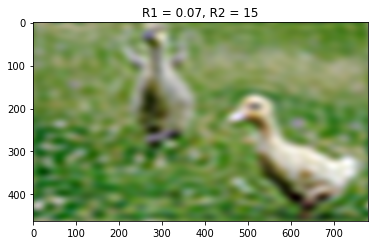

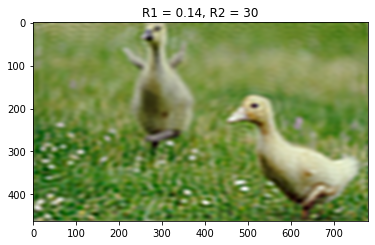

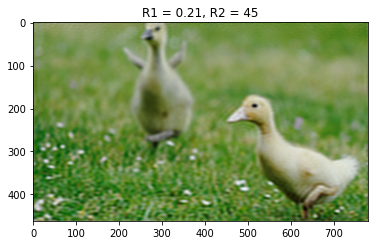

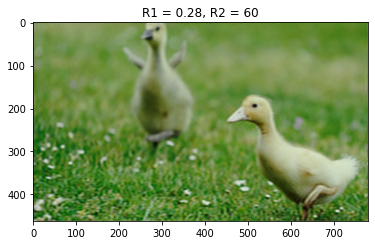

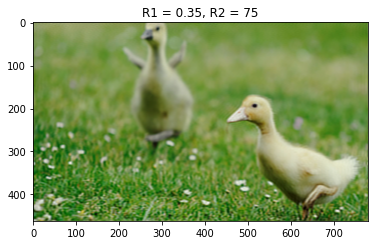

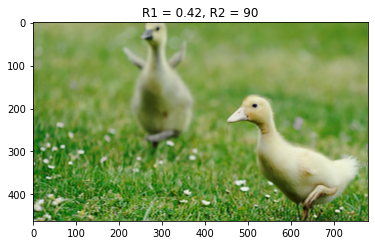

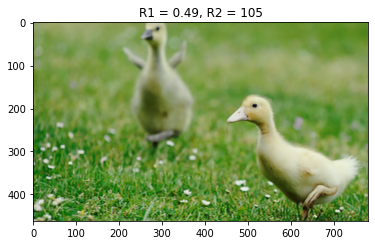

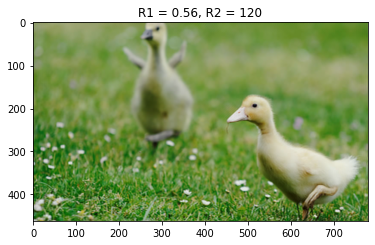

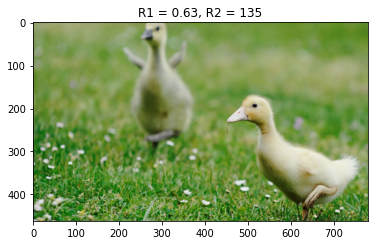

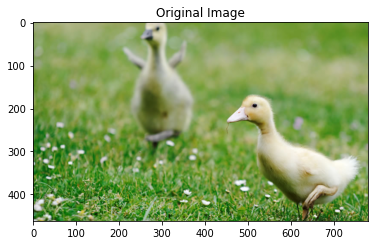

In [149]:
def band_pass_filter(R1=25, R2=50, dim_x=dim_x, dim_y=dim_y):
    M = band_pass_mask(R1=R1, R2=R2, dim_x=dim_x, dim_y=dim_y)

    restored_img = np.dstack([mask_color(i, M) for i in range(3)])
    return restored_img

for i in range(1,10):
    plt.imshow(band_pass_filter(R1=0.07*(i), R2=10*(2*i)))
    plt.title('R1 = ' + str(round(0.07*(i),2)) + ', R2 = ' + str(15*(i)))
    plt.show()

    
plt.imshow(image)
plt.title('Original Image')
plt.show()

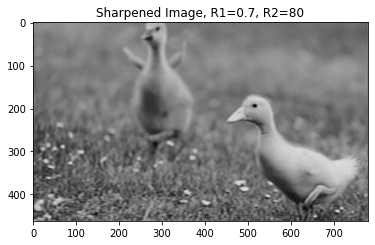

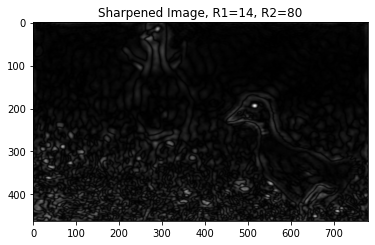

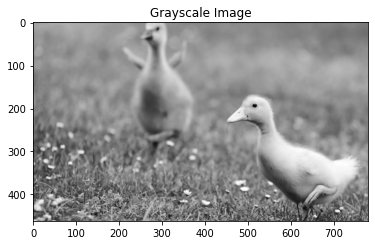

In [142]:
gray_band_mask1 = band_pass_mask(R1=0.7, R2=80)
gray_band_pass1 = inv_color(D2, gray_band_mask1)

plt.imshow(gray_band_pass1, cmap='gist_gray')
plt.title('Sharpened Image, R1=0.7, R2=80')
plt.show()

gray_band_mask2 = band_pass_mask(R1=14, R2=80)
gray_band_pass2 = inv_color(D2, gray_band_mask2)

plt.imshow(gray_band_pass2, cmap='gist_gray')
plt.title('Sharpened Image, R1=14, R2=80')
plt.show()

plt.imshow(grayim, cmap='gist_gray')
plt.title('Grayscale Image')
plt.show()

#### Band Pass Filter (Pt.2)

Laplasian of Gaussian (LoG) filter that I used in 3.3 can also be considered as band pass transform

$$
\text{LoG}(x,y) = -\frac{1}{\pi\sigma^4}\left[1-\frac{x^2+y^2}{2\sigma^2}\right] e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

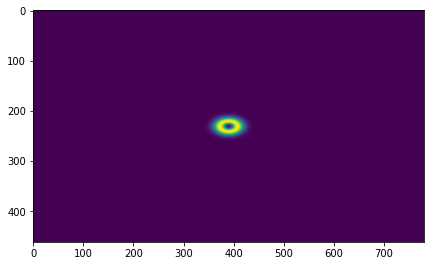

In [146]:

def laplasian_mask(sigma=10, dim_x=dim_x, dim_y=dim_y):
    X, Y = init_x_y(dim_x=dim_x, dim_y=dim_y)

    inner_frac = - (X**2 + Y**2)/(2*sigma**2)
    outer_frac = -1/(np.pi*sigma**4)
    return outer_frac*(1 + inner_frac)*np.exp(inner_frac)


laplasian_M = laplasian_mask(dim_x=dim_x, dim_y=dim_y)

laplasian_mask_1 = fftpack.fft2(laplasian_M)/n
laplasian_mask_2 = fftpack.fftshift(laplasian_mask_1)

plt.figure(figsize=(7,7))
laplasian_mask = np.abs(laplasian_mask_2)
plt.imshow(laplasian_mask)

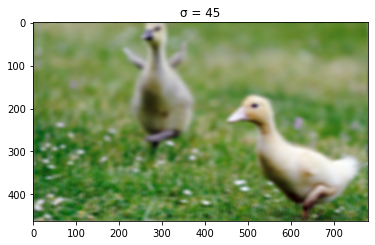

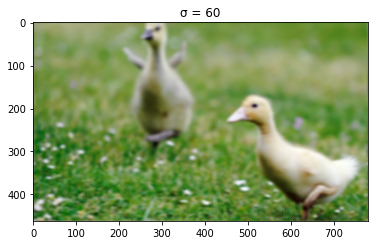

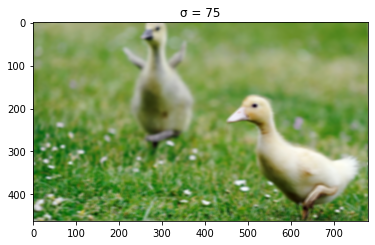

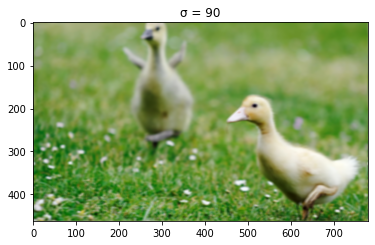

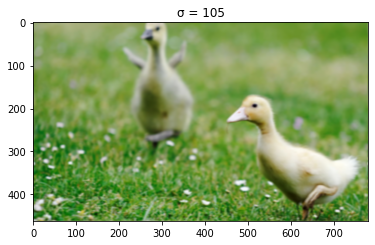

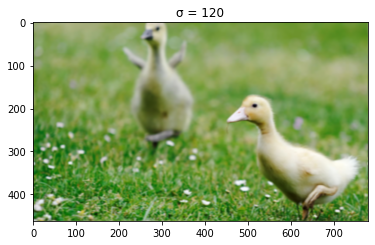

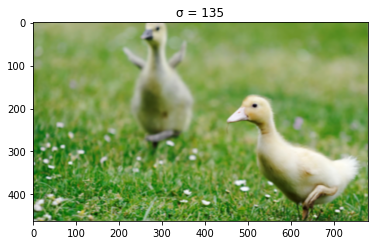

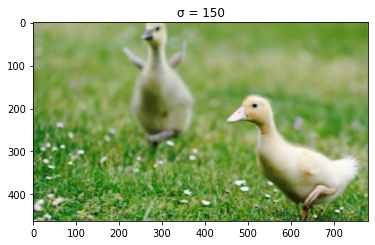

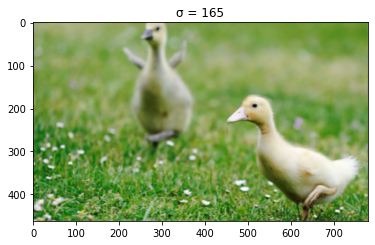

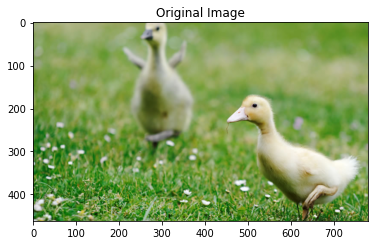

In [152]:
def laplasian_filter(sigma=10, dim_x=dim_x, dim_y=dim_y):
    M = laplasian_mask(sigma=sigma, dim_x=dim_x, dim_y=dim_y)

    restored_img = np.dstack([mask_color(i, M) for i in range(3)])
    return restored_img

for i in range(1,10):
    plt.imshow(laplasian_filter(sigma=15*(i+2)))
    plt.title('σ = ' + str(15*(i+2)))
    plt.show()

    
plt.imshow(image)
plt.title('Original Image')
plt.show()

### Gaussian Blur Filter

Gaussian function is given by

$$
\text{G}(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

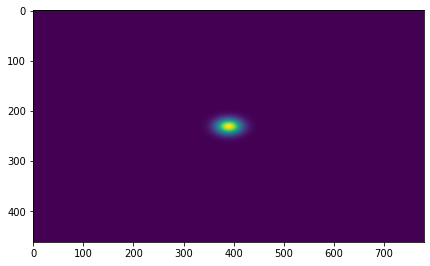

In [157]:
def gaussian_blur_mask(sigma=7, dim_x=dim_x, dim_y=dim_y):
    X, Y = init_x_y(dim_x=dim_x, dim_y=dim_y)

    inner_frac = - (X**2 + Y**2)/(2*sigma**2)
    outer_frac = 1/(2*np.pi*sigma**2)
    return outer_frac*np.exp(inner_frac)


gaussian_M = gaussian_blur_mask(dim_x=dim_x, dim_y=dim_y)

gaussian_mask_1 = fftpack.fft2(gaussian_M)/n
gaussian_mask_2 = fftpack.fftshift(gaussian_mask_1)

plt.figure(figsize=(7,7))
gaussian_mask = np.abs(gaussian_mask_2)
plt.imshow(gaussian_mask)

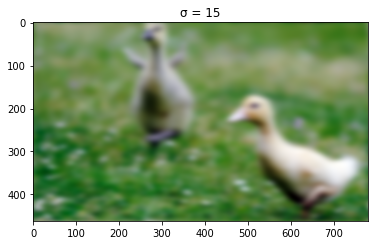

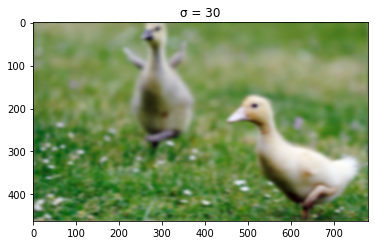

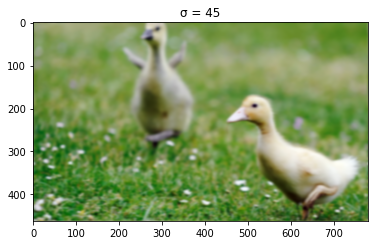

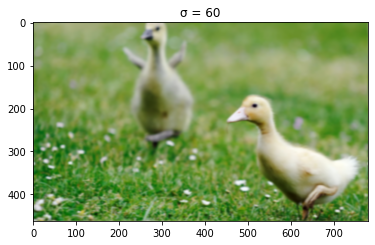

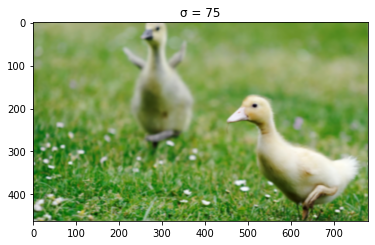

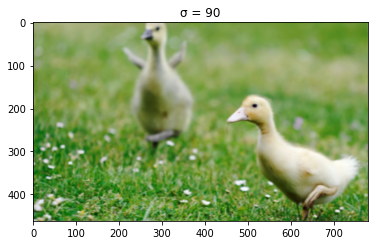

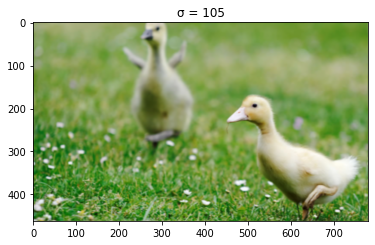

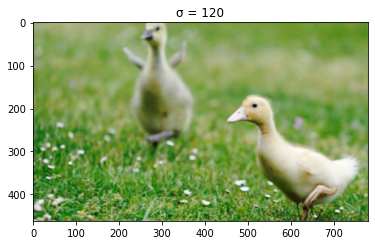

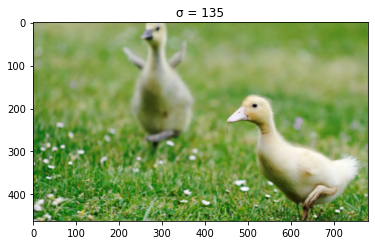

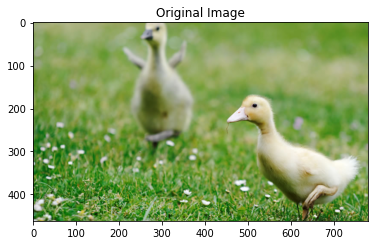

In [160]:
def gaussian_blur_filter(sigma=7, dim_x=dim_x, dim_y=dim_y):
    M = gaussian_blur_mask(sigma=sigma, dim_x=dim_x, dim_y=dim_y)

    restored_img = np.dstack([mask_color(i, M) for i in range(3)])
    return restored_img

for i in range(1,10):
    plt.imshow(gaussian_blur_filter(sigma=15*(i)))
    plt.title('σ = ' + str(15*(i)))
    plt.show()

    
plt.imshow(image)
plt.title('Original Image')
plt.show()